<u>Dataset</u>: diet.csv

For each question below, you are expected to do necessary *PRE-PROCESSING* and make your own *REASONABLE ASSUMPTIONS*. <br>
Choose an appropriate chart such that the information you wish to visualize is *CLEARLY* presented. Please do not dump unnecessary information, a messy and unclear chart will be penalized. <br>
The given sample chart is just to show the expected chart type, your visualization should not look exactly the same to the sample chart. <br>
**To make your chart clear, proper legend, label and title should be included.** <br>
*ANSWER* the question in English based on the chart you created for each question. <br>
Grading will be solely based on your chart and the answer derived from it.

### QUESTION 1
In this question, you need to visualize the information below:

1. Get the top 10 commidities by the protein content per oz (bar) and by price (line) respectively. Ticks on horizontal axis should be the name of the commidities.<br>
2. Highlight those commidities that are top 10 in both rankings. You should not highlight their name labels (in horizontal ticks) but highlight the bars.<br>

Sample Chart:
<img src="Q3.31.png">

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Use the below converter.
# 1lb = 16oz
# 1qt = 32oz
# 1pt = 16oz
converter = [16, 1, 32, 16]
all_measurement = ['lb.', 'oz.', 'qt.', 'pt.']
dictionary = dict(zip(all_measurement, converter))
# print (dictionary)

d= {}
d['oz'] = dictionary 
print(d)



{'oz': {'lb.': 16, 'oz.': 1, 'qt.': 32, 'pt.': 16}}


In [4]:


datatable = pd.read_csv('diet.csv')
subdf_qns1 = datatable.copy()

#converting unit column into all ounces
#split into 2 pandas series
new_column = subdf_qns1['unit'].str.split(' ', expand= True)
cols = ['Value' , 'Value_units']
new_column.columns = cols

#calculate all the 1/2 in the column value
for i in range(len(new_column['Value'])):
    if '/' in new_column['Value'][i]:
        a = new_column['Value'][i].split('/')
        x = int(a[0]) / int(a[1])
        new_column['Value'][i] = str(x)

new_column['Value'] = pd.to_numeric(new_column['Value']) 

#converting all to oz.
# d = {'oz': { 'lb.': 16, 'oz.': 1, 'qt.': 32 , 'pt.' : 16 }}

new_column['Value'] = new_column['Value'] * new_column['Value_units'].map(d['oz'])
new_column['Value_units'] = 'oz.'    


#creating new columns
subdf_qns1['Weight_oz'] = new_column['Value']
protein_per_oz = subdf_qns1['protein_g'] / subdf_qns1['Weight_oz']
subdf_qns1['Protein Per Oz'] = protein_per_oz

protein_by_price = subdf_qns1['protein_g'] / subdf_qns1['price_cents']
subdf_qns1['Protein By Price'] = protein_by_price

subdf_qns1.sort_values(by=['Protein Per Oz'], inplace=True, ascending=False)
temp1 = subdf_qns1.head(10)

subdf_qns1.sort_values(by=['Protein By Price'], inplace=True, ascending=False)
temp2 = subdf_qns1.head(10)

temp3 = pd.concat([temp1, temp2]).drop_duplicates().reset_index(drop=True)

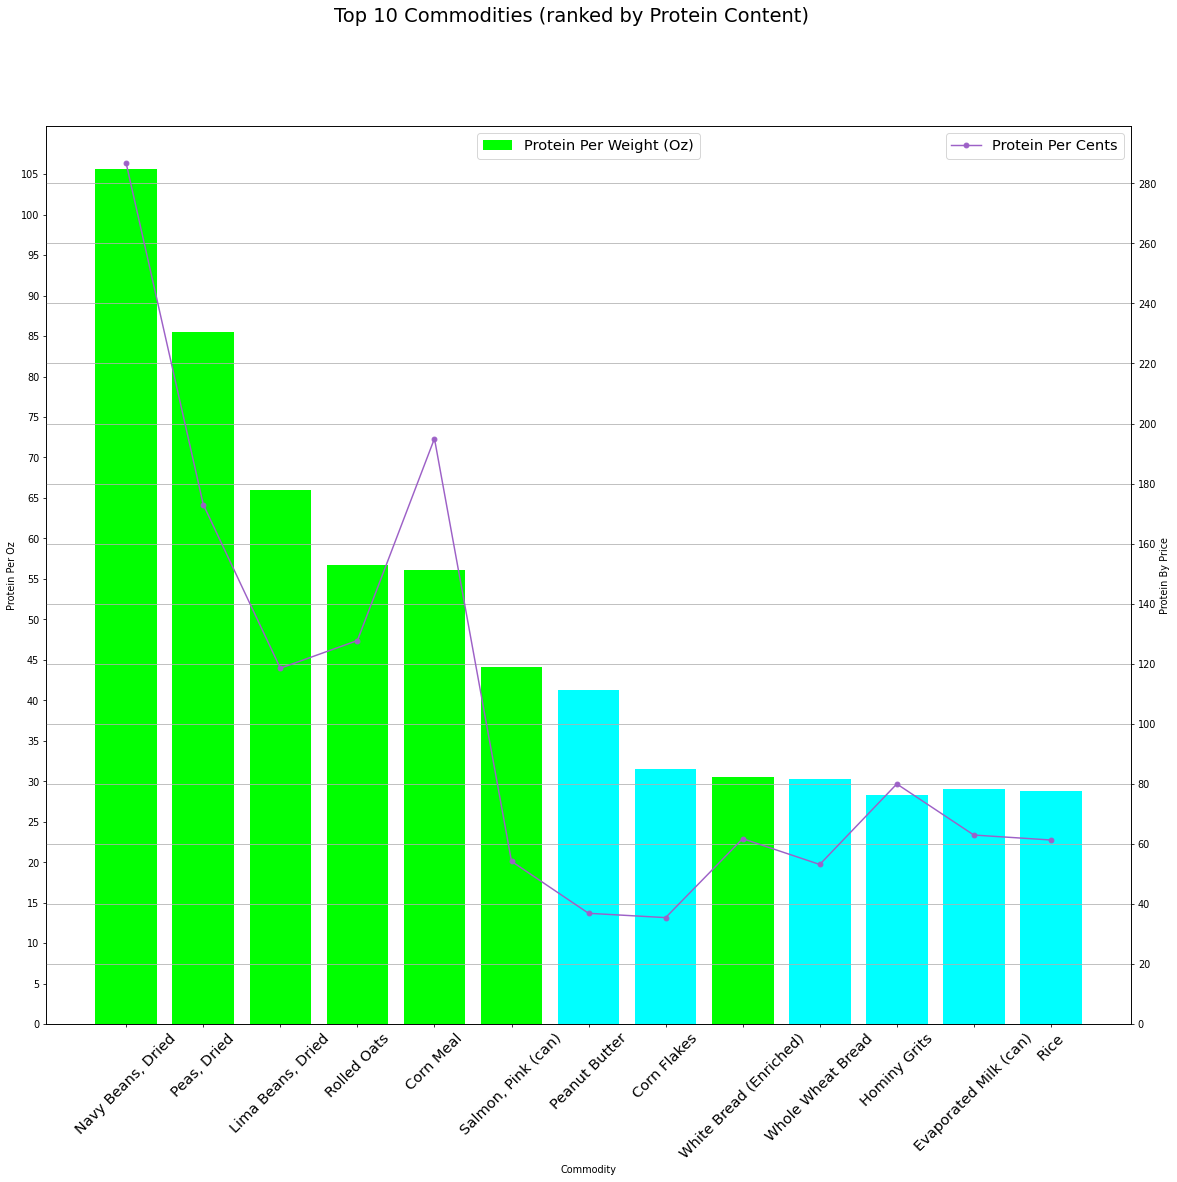

In [4]:
#setting colors for barchart
colors = []
for i in temp3['commodity']:
    if i in temp1['commodity'].values and i in temp2['commodity'].values:
        colors.append('lime')
    else:
        colors.append('cyan') 

#plotting charts

fig = plt.figure(figsize = (20 , 17) , dpi = 70 )


fig.suptitle('Top 10 Commodities (ranked by Protein Content)', fontsize= 20 )

ax1 = fig.add_subplot(111)
ax1.bar(temp3['commodity'],temp3['Protein Per Oz'] , color = colors )


ax1.set_xlabel("Commodity")
ax1.set_ylabel("Protein Per Oz")
plt.yticks(np.arange(0,  max(temp3['Protein Per Oz']), 5.0))
plt.xticks(fontsize=15 , rotation=45)
ax1.legend(('Protein Per Weight (Oz)',), loc="upper center" , fontsize = 15)

ax2=ax1.twinx()
ax2.plot(temp3['commodity'],temp3['Protein By Price'] , color = '#9d61c7' , marker=".", markersize= 10 )
ax2.set_ylabel("Protein By Price")
ax2.set_yticks(np.arange(0,  max(temp3['Protein By Price'])+1, 20.0))
ax2.legend(('Protein Per Cents',), loc="upper right" , fontsize = 15)

plt.grid(axis = 'y')
plt.show()

### CHART ANALYSIS 1.1
The above chart derived from top 10 commodities for Protein per weight (oz.) and Protein by Price (per cents).
However there are overlapping of these items, because some commodities are both on the top 10 on both categories. To be exact, there are Seven (7) of these high ranking items.These 7 commodities are being highlighted in the Lime color.

Among them, the particular  'Navy Bean. Dried' is considered the highest in both categories 

### QUESTION 2

Amy just had boy-girl twins and she wants to know how much vitamin b1 her children needs at each age in the next 10 years. 
The amounts of vitamin b1 for girls and boys at different age are given in the next cell. Please plot lineplots to show the  required amount of vitamin b1 for her girl, her boy and in total respectively.

Sample Chart:
<img src="Q3.32.png">

In [5]:
# Here are the recommended vitamin b1 allowances for girl and boy at each age respectively.
girls_b1 = [0.28, 0.32, 0.38, 0.46, 0.54, 0.62, 0.70, 0.72,0.78]
boys_b1 = [0.28, 0.32, 0.38, 0.46, 0.54, 0.62, 0.74, 0.84, 0.88]
age = ['3 mths', '6 mths', '9 mths', '1 yrs', '2 yrs', '3 yrs', '5 yrs', '7 yrs', '10 yrs']

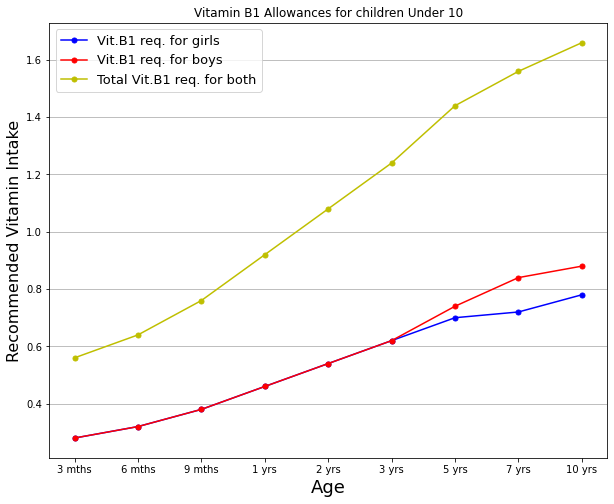

In [8]:
total = np.add(girls_b1 , boys_b1)

plt.figure(figsize = (10,8))
plt.title( 'Vitamin B1 Allowances for children Under 10')
plt.xlabel('Age', fontsize=18)


plt.plot(age , girls_b1 , 'b.-' , markersize = 10)

plt.plot(age , boys_b1 , 'r.-' , markersize = 10)
plt.ylabel('Recommended Vitamin Intake', fontsize=16)

plt.plot(age , total , 'y.-' , markersize = 10)

plt.legend(('Vit.B1 req. for girls', 'Vit.B1 req. for boys' , 'Total Vit.B1 req. for both' , ) ,fontsize = 13)

plt.grid(axis = 'y')
plt.show()

### CHART ANALYSIS 1.2
The above chart depicts the requirement for Vitamin B1 for children under age of 10, blue line is for girls and red line is for boys. Yellow depicts the total requirement for both
For the first 3 years, boys and girls require same level of Vitamin B1. However as they grow beyond age of 3, boys would require more Vitamin b1 compared to the girls 

### Question 3

In this question, we wish to use a chart to see the distribution of each content and the relationship of each pair of contents.
- calories
- protein
- calcium
- iron
- vitamin a
- vitamin b1
- vitamin b2
- niacin
- vitamin c

Sample Chart:
<img src="Q3.34.png">

    calories  protein_g  calcium_g  iron_mg  vitamin_a_iu  vitamin_b1_mg  \
0       44.7       1411        2.0      365           0.0           55.4   
1       11.6        418        0.7       54           0.0            3.2   
2       11.8        377       14.4      175           0.0           14.4   
3       11.4        252        0.1       56           0.0           13.5   
4       36.0        897        1.7       99          30.9           17.4   
..       ...        ...        ...      ...           ...            ...   
58       8.0         77        1.3       39           0.0            0.9   
59      34.9          0        0.0        0           0.0            0.0   
60      14.7          0        0.5       74           0.0            0.0   
61       9.0          0       10.3      244           0.0            1.9   
62       6.4         11        0.4        7           0.2            0.2   

    vitamin_b2_mg  niacin_mg  vitamin_c_mg  
0            33.3        441             0

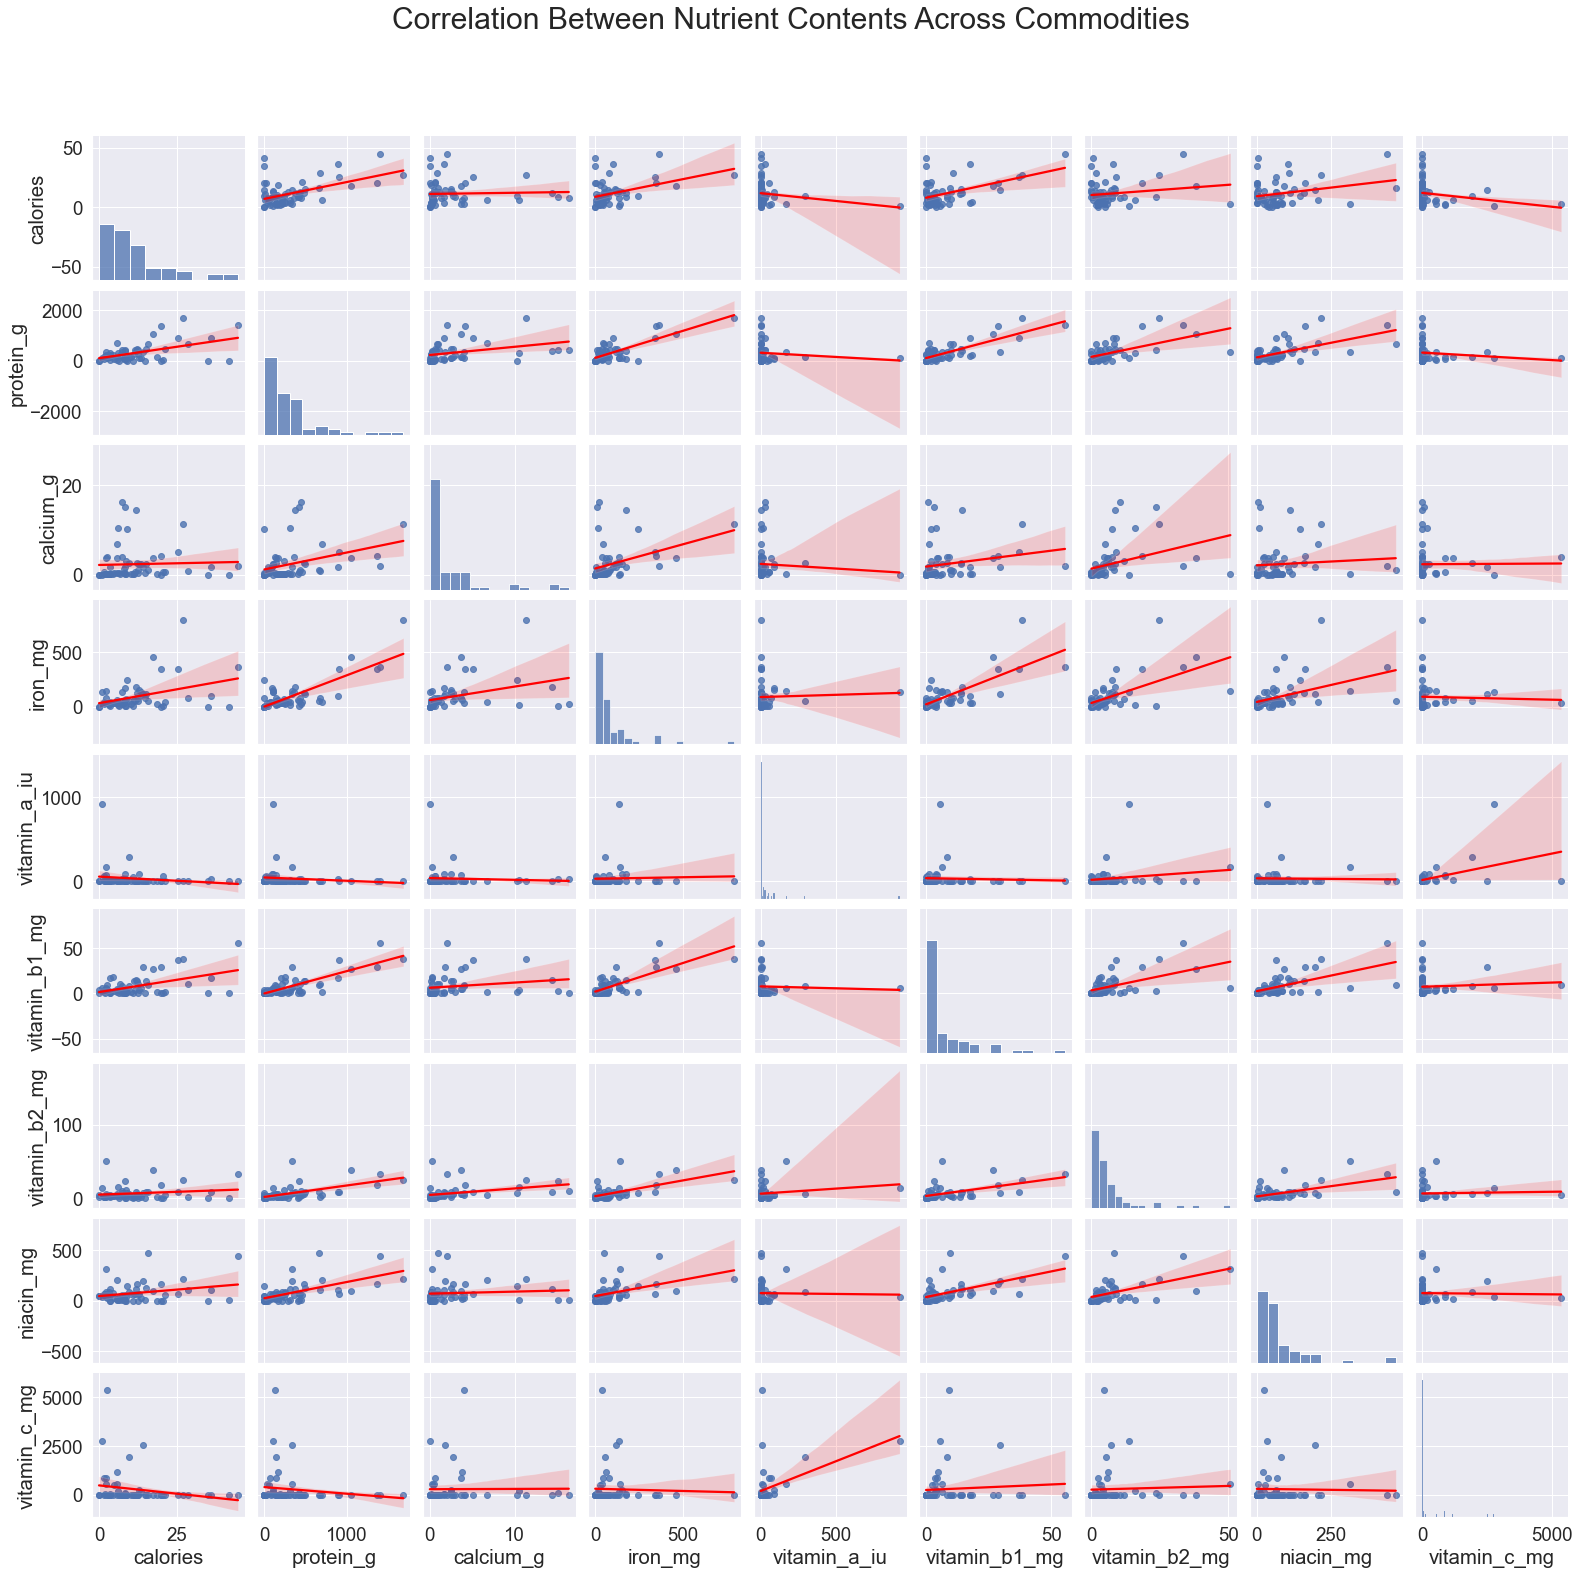

In [9]:
datatable = pd.read_csv('diet.csv')
subtable = datatable.copy()
subdf = subtable.drop(columns = ['commodity','unit' , 'price_cents'] )
print(subdf)

sns.set(style="ticks", color_codes=True)

sns.set_context ('poster' , font_scale = 1.5)
sns.set(font_scale =1.7)

sns.pairplot(subdf, kind="reg", plot_kws={'line_kws':{'color':'red'}})

plt.subplots_adjust(top=0.9)
plt.suptitle("Correlation Between Nutrient Contents Across Commodities", fontsize = 30)


plt.show()

### CHART ANALYSIS 1.3
The above tables show several plots, each plot correlation between 2 different pairs of nutrients contents. Each dots represented ONE commodity's measurement of those 2 particular pairs of nutrients contents. 

For example, in chart (0,1) , it represents correlation between calories and protein. 
First commodity (index = 0), have protein = 1411g and calories = 44.7. This is respectively their x coordination (protein value) and y coordination (calories value), which is represented by a dot on chart (0,1)

Red line and red region shows the regression line and the general trend for the distribution of each nutrient contents.

If it's going upward (positive correlation), it shows that if one commodity contains high 'x' type of nutrient, then its 'y' nutrient content should statistically be higher as well. 
(Example: high calories commodity should generally also contain medium / high contents of proteins)

And if the trend is going downward, it shows reverse correlation between the contents between 2 nutrient contents in 1 commodity ( if one commodity contains high 'x' type of nutrient, then its 'y' nutrient content should be low